In [1]:
#This does the same 534 Heteroskedasticity lesson but gets data from an Oracle database
#cx_Oracle will only read Oracle database
#sqlalchemy gives you the ability to write back to the oracle database

#http://www.jtrive.com/interacting-with-oracle-from-pandas.html
#https://docs.sqlalchemy.org/en/13/core/engines.html   

In [2]:
#From econ 534 Heteroskedasticity lesson
#from Multiple Regression Section
#test for heteroskedasticity using the White (1980) test
#show how to use WLS/GLS to correct for hetereoskedasticity
#White test for heteroskedasticity
#call in homepriceV10 AND hprice1 Oracle table

In [3]:
#Have to import statsmodels and seaborn instance before sqlalchemy execututes code, 
#...otherwise statsmodels and seaborn import failes
import pandas as pd
import statsmodels.api as sm
import seaborn as seabornInstance

In [4]:
#import pandas as pd
from sqlalchemy import create_engine

#oracle_connection_string = 'oracle+cx_oracle://{username}:{password}@{hostname}:{port}/{database}'
#connectionFormat = 'oracle+cx_oracle://{username}:{password}@{hostname}:{port}/{database}'
connectionFormat = 'oracle://{username}:{password}@{hostname}:{port}/{sid}'

engine = create_engine(
    connectionFormat.format(
        username='C##HET',
        password='JFA2',
        hostname='DESKTOP-5TTOA7T.attlocal.net',
        port='1521',
        sid='XE'
        #database='OracExpress1',
    ),
    max_identifier_length=128
)

housedata = pd.read_sql("SELECT * FROM HOMEPRICEV10", engine)

In [5]:
#another method
#import cx_Oracle
#import sqlalchemy
#import pandas as pd
#sql alchemy syntax is "oracle://<USER>:<PASSWORD>@<DATABASE>"
#sql alchemy connection to Oracle database and schema
#DATABASE = "OracExpress1"
#SCHEMA = "C##HET"
#PASSWORD = "JFA2"
#connstr = "oracle://{}:{}@{}".format(C##HET,JFA2,OracExpress1)
#connstr = "oracle://{C##HET}:{JFA2}@{OracExpress1}"
#conn = create_engine(connstr)

In [6]:
#let's prepare a new dataframe
#import pandas as pd
#hpv10data = 'C:/Users/jfras/OneDrive/UND/534AppliedEcon/Datasets/homepriceV10.dta'
#make sure you preserve data types, otherwise it all comes in as strings
#housedata = pd.read_stata(hpv10data, preserve_dtypes=True)
df1 = pd.DataFrame(housedata)
df1['status']=df1['status'].astype('string')
df1['school']=df1['school'].astype('string')
#take a look at the data frame
df1.head()

,hid,id,price,floor,lot,bath,bed,bathbed,year,age,agesq,gar,status,dac,school,ded,dha,dad,dcr,dpa
0,77,1,388.0,2180,4,3.0,4.0,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,78,2,450.0,2054,5,3.0,4.0,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,79,3,386.0,2112,5,2.0,4.0,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,80,4,350.0,1442,6,1.0,2.0,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,81,5,155.5,1800,1,2.0,4.0,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0


In [7]:
print('Check your data Datatypes after import')
print(df1.dtypes)
#if you see any ojbect data types, go back up to prior cell and change them to strings
#look in the prior cell where 'status' and 'school' were changed to strings

Check your data Datatypes after import
hid          int64
id           int64
price      float64
floor        int64
lot          int64
bath       float64
bed        float64
bathbed    float64
year         int64
age        float64
agesq      float64
gar          int64
status      string
dac          int64
school      string
ded          int64
dha          int64
dad          int64
dcr          int64
dpa          int64
dtype: object


In [8]:
#some summary stats
df1.describe()

,hid,id,price,floor,lot,bath,bed,bathbed,year,age,agesq,gar,dac,ded,dha,dad,dcr,dpa
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,114.500000,38.500000,285.796053,1970.394737,3.986842,2.207895,3.447368,7.672368,1969.407895,-0.059211,5.449868,1.565789,0.328947,0.157895,0.184211,0.039474,0.078947,0.197368
std,22.083176,22.083176,60.333216,212.419966,1.653227,0.570325,0.737468,2.764663,23.492511,2.349251,8.206546,0.771760,0.472953,0.367065,0.390232,0.196013,0.271448,0.400657
min,77.000000,1.000000,155.500000,1440.000000,1.000000,1.000000,2.000000,2.000000,1905.000000,-6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.750000,19.750000,242.750000,1860.750000,3.000000,2.000000,3.000000,6.000000,1957.750000,-1.225000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114.500000,38.500000,276.000000,1966.500000,4.000000,2.000000,3.000000,6.300000,1969.500000,-0.050000,1.220000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,133.250000,57.250000,336.750000,2107.500000,5.000000,3.000000,4.000000,9.000000,1980.000000,1.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,152.000000,76.000000,450.000000,2896.000000,11.000000,3.100000,6.000000,15.000000,2005.000000,3.500000,42.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#take a look at the data frame shape
df1.shape
#(rows,columns)

(76, 20)

In [10]:
#descriptive analysis by graphing
#using pyplot from matplotlib
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

#known issue with having import statement in same cell as graph code,
#graph won't work until you executive block twice

#https://github.com/jupyter/notebook/issues/3691
#https://github.com/ipython/ipython/pull/11916
#code from pull 11916
#import ipykernel.pylab.backend_inline
#matplotlib.rcParams['backend'] = backend
#matplotlib.pyplot.switch_backend(backend)
#plt.switch_backend(backend)
#plt.show._needmain = False

<Figure size 432x288 with 0 Axes>

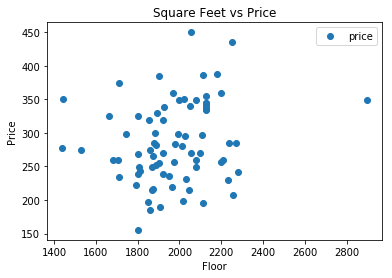

In [11]:
#some options...
#plt.ion()
#plt.figure(figsize=(15,10))
plt.tight_layout()
#now the plot using matplotlib.pyplot.plot
#style is the third optional argument which is the color and line type
df1.plot(x='floor', y='price', style='o')
plt.title('Square Feet vs Price')
plt.xlabel('Floor')  
plt.ylabel('Price')
plt.pause(.10)
plt.show(block=False)

#legend disappears with this method below
##plt.plot('floor', 'price', 'o', data=df)
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html


C:\Users\jfras\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Suppor

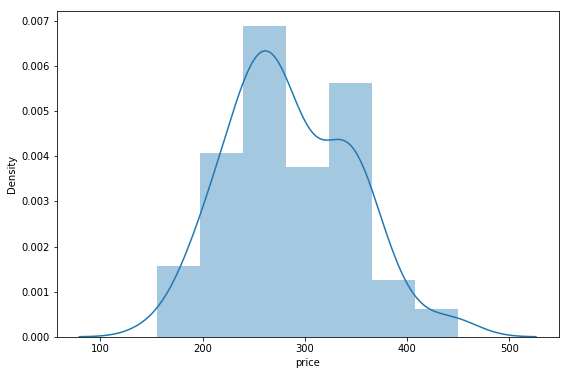

In [12]:
#check distribution of price using seaborn
#import seaborn as seabornInstance 
plt.figure(figsize=(9,6))
plt.tight_layout()
seabornInstance.distplot(df1['price'])

In [13]:
#setup 3 variables as a dataframe of independent variables for later use
#####################flbdata = pd.read_stata(hpv10data,columns=['floor', 'lot', 'bed'],preserve_dtypes=True).values
flbdata = pd.read_sql("SELECT floor,lot,bed FROM HOMEPRICEV10", engine)

#X = pd.read_stata(hpv10data, preserve_dtypes=True)
X = pd.DataFrame(flbdata)
X.columns =['floor','lot','bed']
#a constant must be added for the het_white test to work
X['constant']=1
X.shape
#print(X)
X.columns.values
X.head()
#print(X.dtypes)

,floor,lot,bed,constant
0,2180,4,4.0,1
1,2054,5,4.0,1
2,2112,5,4.0,1
3,1442,6,2.0,1
4,1800,1,4.0,1


In [14]:
#setup y as the dependent variable dataframe for later use
pricedata = df1['price'].values.reshape(-1,1)
y = pd.DataFrame(pricedata)
y.columns =['price']
y.shape
y.head()
print(y.dtypes)

price    float64
dtype: object


In [15]:
#create the regression using stats models
#import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#regress price on lot, floor, bed
expr1 = 'y ~ lot + floor + bed'
lm1 = ols(expr1, df1).fit()
print(lm1.summary())


#can print specific parts of the results
#print(regr.intercept_)
#print(regr.coef_)

#could have use sklean as below but, statsmodels anova table looks nicer
#from sklearn.linear_model import LinearRegression
#regress price on lot, floor, bed
#regr = LinearRegression()
#regr.fit(X, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.449
Date:                Thu, 15 Oct 2020   Prob (F-statistic):            0.00197
Time:                        07:07:17   Log-Likelihood:                -411.15
No. Observations:                  76   AIC:                             830.3
Df Residuals:                      72   BIC:                             839.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    199.5321     64.415      3.098      0.0

In [16]:
#you can use these commands to print the attributes of the regeression, similair to STATA's "e"
#print("summary()\n",lm1.summary())
#print("pvalues()\n",lm1.pvalues)
#print("tvalues()\n",lm1.tvalues)
print("rsquared()\n",lm1.rsquared)
#print("rsquared_adj()\n",lm2.rsquared_adj)
print("parameters()\n",lm1.params)

#https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults

rsquared()
 0.18502568410126918
parameters()
 Intercept    199.532083
lot            6.051861
floor          0.076634
bed          -25.777043
dtype: float64


In [17]:
#https://www.statsmodels.org/v0.10.2/examples/notebooks/generated/predict.html

In [18]:
print("residuals()\n",lm1.resid)

residuals()
 0     100.306648
1     165.910663
2      97.465895
3      55.204690
4     -84.916870
         ...    
71    -36.258453
72    -44.115552
73     73.572298
74     11.652876
75     32.713787
Length: 76, dtype: float64


In [19]:
print("predicted value()\n",lm1.fittedvalues)

predicted value()
 0     287.693352
1     284.089337
2     288.534105
3     294.795310
4     240.416870
         ...    
71    286.158453
72    259.115552
73    361.427702
74    263.247124
75    316.786213
Length: 76, dtype: float64


In [20]:
#add predicted and residual value to dataframe
df1['yhat'] = lm1.fittedvalues
df1['uhat'] = lm1.resid
#df1.shape
#if you want to look a visual of dataframe at this point
df1.head()

,hid,id,price,floor,lot,bath,bed,bathbed,year,age,...,status,dac,school,ded,dha,dad,dcr,dpa,yhat,uhat
0,77,1,388.0,2180,4,3.0,4.0,12.0,1940,-3.0,...,Sold,0,Edison,1,0,0,0,0,287.693352,100.306648
1,78,2,450.0,2054,5,3.0,4.0,12.0,1957,-1.3,...,Sold,0,Edison,1,0,0,0,0,284.089337,165.910663
2,79,3,386.0,2112,5,2.0,4.0,8.0,1955,-1.5,...,Sold,0,Edison,1,0,0,0,0,288.534105,97.465895
3,80,4,350.0,1442,6,1.0,2.0,2.0,1956,-1.4,...,Active,1,Adams,0,0,1,0,0,294.795310,55.204690
4,81,5,155.5,1800,1,2.0,4.0,8.0,1994,2.4,...,Sold,0,Adams,0,0,1,0,0,240.416870,-84.916870


In [21]:
# calculate residual (uhat) for plotting
#uhat= df1.price-df1.yhat
#print(uhat)
#uhat.shape

In [22]:
#first create the predicted value of y for plotting
#yhat = lm1.predict()
#print(yhat)

C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jfras\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'Actual Price vs Predicted Price')

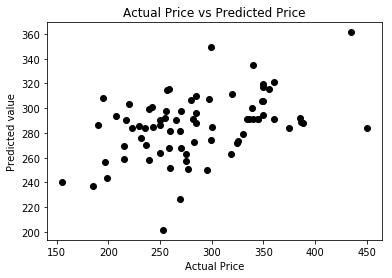

In [23]:
#visualize price on x axes and predicted price on y axes
plt.plot(df1.price, df1.yhat, 'o', color='black')
plt.xlabel('Actual Price')  
plt.ylabel('Predicted value')
plt.title("Actual Price vs Predicted Price")

In [24]:
#LONG METHOD FOR WHITE TEST
#now do the white test for heteroskedasticity showing the work done by the library function het_white behind the scenes

In [25]:
#prep some interative variables for white test

Text(0,0.5,'Residual')

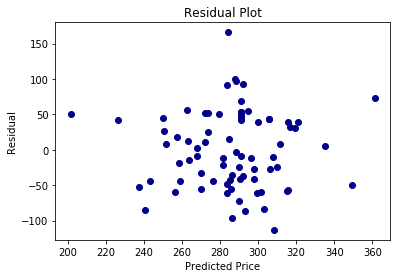

In [26]:
#residual plot
plt.plot(df1.yhat,df1.uhat, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")

In [27]:
#to do the long method of the white test(show how it works)
#create some interaction variables and add them to the data frame
df1['uhat_2'] = df1.uhat * df1.uhat
df1['lot_floor'] = df1.lot * df1.floor
df1['lot_bed'] = df1.lot * df1.bed
df1['floor_bed'] = df1.floor * df1.bed
df1['lot_2'] = df1.lot * df1.lot
df1['floor_2'] = df1.floor * df1.floor
df1['bed_2'] = df1.bed * df1.bed
#check the dataframe, previously was 21 columns, should have added 7 columns for a total of 28
df1.shape
#df.tail()

(76, 29)

In [28]:
df1.head()

,hid,id,price,floor,lot,bath,bed,bathbed,year,age,...,dpa,yhat,uhat,uhat_2,lot_floor,lot_bed,floor_bed,lot_2,floor_2,bed_2
0,77,1,388.0,2180,4,3.0,4.0,12.0,1940,-3.0,...,0,287.693352,100.306648,10061.423575,8720,16.0,8720.0,16,4752400,16.0
1,78,2,450.0,2054,5,3.0,4.0,12.0,1957,-1.3,...,0,284.089337,165.910663,27526.348223,10270,20.0,8216.0,25,4218916,16.0
2,79,3,386.0,2112,5,2.0,4.0,8.0,1955,-1.5,...,0,288.534105,97.465895,9499.600620,10560,20.0,8448.0,25,4460544,16.0
3,80,4,350.0,1442,6,1.0,2.0,2.0,1956,-1.4,...,0,294.795310,55.204690,3047.557745,8652,12.0,2884.0,36,2079364,4.0
4,81,5,155.5,1800,1,2.0,4.0,8.0,1994,2.4,...,0,240.416870,-84.916870,7210.874820,1800,4.0,7200.0,1,3240000,16.0


In [29]:
#if you make a mistake you can drop a variable with for example df.drop([uhat_2,axis=1])
#axis=1 means column not a row

In [30]:
#using statsmodels
#and using these interactive variables and the residual uhat from above
#regress residual squared on 'floor', 'lot', 'bed','lot_floor','lot_bed','floor_bed','lot_2','floor_2','bed_2'
expr2 = 'uhat_2 ~ lot + floor + bed + lot_floor + lot_bed + floor_bed + lot_2 + floor_2 + bed_2'
lm2 = ols(expr2, df1).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                 uhat_2   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.3861
Date:                Thu, 15 Oct 2020   Prob (F-statistic):              0.938
Time:                        07:07:17   Log-Likelihood:                -734.81
No. Observations:                  76   AIC:                             1490.
Df Residuals:                      66   BIC:                             1513.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3459.2270   3.05e+04     -0.113      0.9

In [31]:
#you can use these commands to print the attributes of the regeression, similair to stata's "e"
#print("summary()\n",lm2.summary())
#print("pvalues()\n",lm2.pvalues)
#print("tvalues()\n",lm2.tvalues)
print("rsquared()\n",lm2.rsquared)
#print("rsquared_adj()\n",lm2.rsquared_adj)
print("parameters()\n",lm2.params)

rsquared()
 0.05002108179006537
parameters()
 Intercept    -3459.227007
lot          -3138.960278
floor           32.808893
bed         -12567.514730
lot_floor        1.248386
lot_bed        195.852262
floor_bed        6.271410
lot_2            9.334659
floor_2         -0.014615
bed_2          -40.108702
dtype: float64


In [32]:
#you can declare variables from regression attributes for later use
#R squared
rsquaredlm2 = lm2.rsquared
print (rsquaredlm2)
#degrees of freedom
degfreedmodlm2 = lm2.df_model
print(degfreedmodlm2)
#degrees of freedom for the residutal
degfreedreslm2 = lm2.df_resid
print(degfreedreslm2)
#number of observations for regression
numobslm2 = lm2.nobs
print(numobslm2)


0.05002108179006537
9.0
66.0
76.0


In [33]:
#try to emulate STATA's di chi2tail(9, e(r2)*e(N)), #di is display
#--Description: the reverse cumulative (upper tail or survivor) 
#--X2 distribution with df degrees of
#--freedom; 1 if x < 0
#--chi2tail(df,x) = 1 - chi2(df,x)

In [34]:
#comparison for upcoming chi squared test
from scipy.stats import chi2
#scipy.stats.chi2(*args, **kwds) = <scipy.stats._continuous_distns.chi2_gen object>
#find the critical value for a 95% confidence level
value = chi2.ppf(0.95, degfreedmodlm2)
print("crifical value for 95% conficence level with 9 degrees of freedom \n",value)

#confirm with cdf
p= chi2.cdf(value, degfreedmodlm2)
print(p)

#scipy.stats.chi2(*args, **kwds) = <scipy.stats._continuous_distns.chi2_gen object>
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.chi2.html

crifical value for 95% conficence level with 9 degrees of freedom 
 16.918977604620448
0.95


In [35]:
arg2=(lm2.rsquared * lm2.nobs)
value2 = chi2.cdf(arg2, degfreedmodlm2)
value3 = (1-(chi2.cdf(arg2, degfreedmodlm2)))
print(value2)
print(value3)

0.07602149508782916
0.9239785049121708


In [36]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html    

In [37]:
#some white test instructions
#null for white test is homoskedasticity
#faling to reject null means homoskedasticity

#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.power_divergence.html#scipy.stats.power_divergence
#https://www.programiz.com/python-programming/tuple
#https://mgimond.github.io/Stats-in-R/ChiSquare_test.html

In [38]:
#quick white test
#returns
#-Lagrange multiplier stat
#-p-value of Langrange multiplier test
#-F-Statistic of the hypothesis that error variance does not depend on x
#-p-value of the F statistic

# X dataframe is from cell 9
# y dataframe is from cell 10
#df9a dataframe is from cell 18
#df1 dataframe is updated in cell 19

from statsmodels.stats.diagnostic import het_white
white_test1 = het_white(lm1.resid,X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic','F-Test p-value']
print(dict(zip(labels, white_test1)))

#https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab
#https://www.statsmodels.org/v0.10.1/generated/statsmodels.stats.diagnostic.het_white.html
#https://medium.com/keita-starts-data-science/heteroskedasticity-in-linear-regressions-and-python-16eb57eaa09

{'LM Statistic': 3.801602216044985, 'LM-Test p-value': 0.9239785049121698, 'F-Statistic': 0.3861362177928016, 'F-Test p-value': 0.9377397929507966}


In [39]:
#quick breuschpagan test
from statsmodels.stats.diagnostic import het_breuschpagan
pg_test1 = het_breuschpagan(lm1.resid,X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic','F-Test p-value']
print(dict(zip(labels, pg_test1)))

{'LM Statistic': 1.040730212801673, 'LM-Test p-value': 0.7913977730353414, 'F-Statistic': 0.3332146267986428, 'F-Test p-value': 0.801345204860645}


In [40]:
#now we'll collect some of the above regressions and print in an excel table
#import the summary_col from the statsmodels library
from statsmodels.iolib.summary2 import summary_col
#example,dictionary of values to be called, .2f is a float with two decimals, d rounds to integer
info_dict1={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table1 = summary_col(results=[lm1,lm2],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         ],
                            info_dict=info_dict1,
                            regressor_order=['Intercept',
                                             'lot',
                                             'floor',
                                             'bed'])

results_table1.add_title('Table 1 - OLS Regressions')

print(results_table1)

      Table 1 - OLS Regressions
                  Model 1   Model 2  
-------------------------------------
Intercept        199.53*** -3459.23  
                 (64.42)   (30536.00)
lot              6.05      -3138.96  
                 (3.99)    (4469.84) 
floor            0.08**    32.81     
                 (0.03)    (25.96)   
bed              -25.78*** -12567.51 
                 (9.21)    (14788.81)
bed_2                      -40.11    
                           (864.43)  
floor_bed                  6.27      
                           (5.71)    
lot_2                      9.33      
                           (103.01)  
lot_floor                  1.25      
                           (2.06)    
lot_bed                    195.85    
                           (659.33)  
floor_2                    -0.01     
                           (0.01)    
R-squared        0.19      0.05      
R-squared Adj.   0.15      -0.08     
R-squared        0.19      0.05      
No. observations 7

In [41]:
#pandas built-in csv module
import csv
#three file types supported
#results_text1 = results_table.as_latex()
#results_text1 = results_table.as_html()
results_text1 = results_table1.as_text()
#the r converts a normal string to a raw string
#'w' is write mode, 'r' is read mode
resultFile1 = open(r'C:\Users\jfras\OneDrive\DataScience\Python\table1.csv','w',newline='')
resultFile1.write(results_text1)
resultFile1.close()
#this produces a csv with all columns in one, look at the next block of code

#pandas function to read and write the csv doesn't do anything except change the extension
read_file = pd.read_csv (r'C:\Users\jfras\OneDrive\DataScience\Python\table1.csv',sep='\t')
read_file.to_excel (r'C:\Users\jfras\OneDrive\DataScience\Python\table1x.xlsx', index = None, header=True)

#https://realpython.com/python-csv/#writing-csv-files-with-csv
#https://realpython.com/python-csv/#writing-csv-file-from-a-dictionary-with-csv

In [42]:
### HERE WE START USING A NEW DATA file, has log of some fields

In [43]:
#hprice1data = 'C:/Users/jfras/OneDrive/UND/534AppliedEcon/Datasets/hprice1.dta'
housedata2 = pd.read_sql("SELECT * FROM HPRICE1", engine)
#make sure you preserve data types, otherwise it all comes in as strings
#housedata2 = pd.read_stata(hprice1data, preserve_dtypes=True)
df20 = pd.DataFrame(housedata2)
#take a look at the data frame
df20.head()
#df20.shape

,pid,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,89,300.0,349.1,4.0,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,90,370.0,351.5,3.0,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,91,191.0,217.7,3.0,5200,1374,0,5.252274,5.383118,8.556414,7.225481
3,92,195.0,231.8,3.0,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,93,373.0,319.1,4.0,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [44]:
print('Check your data Datatypes after import')
print(df20.dtypes)
#if you see any ojbect data types, go back up to prior cell and change them to strings
#look in the prior cell where 'status' and 'school' were changed to strings

Check your data Datatypes after import
pid           int64
price       float64
assess      float64
bdrms       float64
lotsize       int64
sqrft         int64
colonial      int64
lprice      float64
lassess     float64
llotsize    float64
lsqrft      float64
dtype: object


In [45]:
#regress price on lotsize, square feet, bedrooms
expr20 = 'df20.price ~ df20.lotsize + df20.sqrft + df20.bdrms'
lm20 = ols(expr20, df20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:             df20.price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.70e-20
Time:                        07:07:17   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.7697     29.475     -0.739   

In [46]:
print("residuals()\n",lm20.resid)

residuals()
 0    -45.639680
1     74.848646
2     -8.236640
3    -12.081602
4     18.093276
        ...    
83    37.147101
84    -6.402523
85   -23.651532
86    54.418113
87   -19.683340
Length: 88, dtype: float64


In [47]:
print("predicted value()\n",lm20.fittedvalues)

predicted value()
 0     345.639680
1     295.151354
2     199.236640
3     207.081602
4     354.906724
         ...    
83    257.852899
84    242.402523
85    226.151532
86    164.581887
87    261.683340
Length: 88, dtype: float64


In [48]:
#from hprice1.dta
#setup 3 variables as a dataframe of independent variables for later use
#exogdata21 = pd.read_stata(hprice1data,columns=['lotsize','sqrft','bdrms'],preserve_dtypes=True).values
exogdata21 = pd.read_sql("SELECT lotsize,sqrft,bdrms FROM HPRICE1", engine)
X21 = pd.DataFrame(exogdata21)
X21.columns =['lotsize','sqrft','bdrms']
X21["constant"]=1
X21.shape
#print(X)
X21.columns.values
#X21.head()
print(X21.dtypes)

lotsize       int64
sqrft         int64
bdrms       float64
constant      int64
dtype: object


In [49]:
white_test2 = het_white(lm20.resid,X21)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic','F-Test p-value']
print(dict(zip(labels, white_test2)))

{'LM Statistic': 33.7318260656134, 'LM-Test p-value': 9.952264738345948e-05, 'F-Statistic': 5.386997044015312, 'F-Test p-value': 1.0128327665173001e-05}


In [50]:
#now do a regression using logs

In [51]:
#regress price on lotsize, square feet, bedrooms
expr30 = 'df20.lprice ~ df20.llotsize + df20.lsqrft + df20.bdrms'
lm30 = ols(expr30, df20).fit()
print(lm30.summary())

                            OLS Regression Results                            
Dep. Variable:            df20.lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           9.74e-19
Time:                        07:07:18   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2970      0.651     -1.992

In [52]:
#from hprice1.dta
#setup 3 variables as a dataframe of independent variables for later use
#exogdata31 = pd.read_stata(hprice1data,columns=['llotsize','lsqrft','bdrms'],preserve_dtypes=True).values
exogdata31 = pd.read_sql("SELECT llotsize,lsqrft,bdrms FROM HPRICE1", engine)
X31 = pd.DataFrame(exogdata31)
X31.columns =['log lotsize','log sqrft','bdrms']
X31["constant"]=1
X31.shape
#print(X)
X31.columns.values
#X31.head()
print(X31.dtypes)

log lotsize    float64
log sqrft      float64
bdrms          float64
constant         int64
dtype: object


In [53]:
white_test3 = het_white(lm30.resid,X31)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic','F-Test p-value']
print(dict(zip(labels, white_test3)))

{'LM Statistic': 9.549447256087575, 'LM-Test p-value': 0.3881744380895394, 'F-Statistic': 1.054955934977116, 'F-Test p-value': 0.4053128454020201}


In [54]:
#now do a regression using robust standard errors
#regress price on lotsize, square feet, bedrooms
expr40 = 'df20.price ~ df20.lotsize + df20.sqrft + df20.bdrms'
lm40 = ols(expr40, df20).fit(cov_type='HC1')
print(lm40.summary())

#HC1 applies a degrees of freedom-based correction, (n−1)/(n−k) 
#where n is the number of observations and k is the number of 
#explanatory or predictor variables in the model.
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html#statsmodels.regression.linear_model.RegressionResults.get_robustcov_results

                            OLS Regression Results                            
Dep. Variable:             df20.price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     23.72
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           3.25e-11
Time:                        07:07:18   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.7697     37.138     -0.586   

In [55]:
### Applying GLS ###

In [56]:
#going back to the df20 dataframe (from the hprice1.dta dataset)
#we repeat the lm1 model residuals and predicted values
print("residuals()\n",lm20.resid)
print("predicted value()\n",lm20.fittedvalues)

residuals()
 0    -45.639680
1     74.848646
2     -8.236640
3    -12.081602
4     18.093276
        ...    
83    37.147101
84    -6.402523
85   -23.651532
86    54.418113
87   -19.683340
Length: 88, dtype: float64
predicted value()
 0     345.639680
1     295.151354
2     199.236640
3     207.081602
4     354.906724
         ...    
83    257.852899
84    242.402523
85    226.151532
86    164.581887
87    261.683340
Length: 88, dtype: float64


In [57]:
#back to dataframe20 (df20)
df20.head()

,pid,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,89,300.0,349.1,4.0,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,90,370.0,351.5,3.0,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,91,191.0,217.7,3.0,5200,1374,0,5.252274,5.383118,8.556414,7.225481
3,92,195.0,231.8,3.0,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,93,373.0,319.1,4.0,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [58]:
#don't need to rerun model as we do in STATA

In [59]:
#add predicted value, residual and residual squared to df20
df20['yhat'] = lm20.fittedvalues
df20['uhat'] = lm20.resid
df20['uhat_2'] = df20.uhat * df20.uhat
#df20.shape
#if you want to look a visual of dataframe at this point
df20.head()

,pid,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft,yhat,uhat,uhat_2
0,89,300.0,349.1,4.0,6126,2438,1,5.703783,5.855359,8.720297,7.798934,345.639680,-45.639680,2082.980434
1,90,370.0,351.5,3.0,9903,2076,1,5.913503,5.862210,9.200593,7.638198,295.151354,74.848646,5602.319751
2,91,191.0,217.7,3.0,5200,1374,0,5.252274,5.383118,8.556414,7.225481,199.236640,-8.236640,67.842243
3,92,195.0,231.8,3.0,4600,1448,1,5.273000,5.445875,8.433811,7.277938,207.081602,-12.081602,145.965109
4,93,373.0,319.1,4.0,6095,2514,1,5.921578,5.765504,8.715224,7.829630,354.906724,18.093276,327.366640


In [60]:
#regress price on lotsize, square feet, bedrooms
expr50 = 'df20.uhat_2 ~ df20.lotsize + df20.sqrft'
lm50 = ols(expr50, df20).fit()
print(lm50.summary())

                            OLS Regression Results                            
Dep. Variable:            df20.uhat_2   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     7.454
Date:                Thu, 15 Oct 2020   Prob (F-statistic):            0.00104
Time:                        07:07:18   Log-Likelihood:                -897.55
No. Observations:                  88   AIC:                             1801.
Df Residuals:                      85   BIC:                             1809.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3439.4408   2580.905     -1.333   

In [61]:
print("predicted value()\n",lm50.fittedvalues)

predicted value()
 0     3879.407991
1     3753.276817
2     1043.473896
3     1104.530818
4     4062.063843
         ...     
83    2370.391154
84    2020.248766
85    1774.732877
86     811.605595
87    1987.020907
Length: 88, dtype: float64


In [62]:
### APPLYING GLS to correct for heteroskedasticity

In [63]:
#reminder of what out dataframe looks like at this point
#from code above
#regress price on lot, floor, bed
#expr1 = 'y ~ lot + floor + bed'
# get residual (uhat)
#uhat= y-yhat
#df['uhat_2'] = uhat * uhat
df20.shape

(88, 14)

In [64]:
#reminder of what out dataframe looks like at this point
df20.tail()

,pid,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft,yhat,uhat,uhat_2
83,172,295.0,318.3,3.0,6056,1837,1,5.686975,5.762994,8.708805,7.515889,257.852899,37.147101,1379.907127
84,173,236.0,259.4,3.0,5828,1715,0,5.463832,5.558371,8.670429,7.447168,242.402523,-6.402523,40.992295
85,174,202.5,258.1,3.0,6341,1574,0,5.310740,5.553347,8.754792,7.361375,226.151532,-23.651532,559.394947
86,175,219.0,232.0,2.0,6362,1185,0,5.389072,5.446737,8.758098,7.077498,164.581887,54.418113,2961.330991
87,176,242.0,252.0,4.0,4950,1774,1,5.488938,5.529429,8.507143,7.480992,261.683340,-19.683340,387.433863


In [65]:
expr51 = 'df20.uhat_2 ~ df20.lotsize + df20.sqrft'
lm51 = ols(expr51, df20).fit()
print(lm51.summary())

                            OLS Regression Results                            
Dep. Variable:            df20.uhat_2   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     7.454
Date:                Thu, 15 Oct 2020   Prob (F-statistic):            0.00104
Time:                        07:07:18   Log-Likelihood:                -897.55
No. Observations:                  88   AIC:                             1801.
Df Residuals:                      85   BIC:                             1809.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3439.4408   2580.905     -1.333   

In [66]:
#create the predicted value of y, note: uhat51 is not a residual
uhat51_fitted = lm51.predict()
#add to the dataframe
df20['uhat51_fitted'] = uhat51_fitted
#check the dataframe, previously was 13 columns, should have added 1 column for a total of 14
df20.shape
#df20.tail()

(88, 15)

In [67]:
#using numpy square root function
#add to the dataframe
df20['price_t'] = df20.price / np.sqrt(df20.uhat51_fitted)
df20['lotsize_t'] = df20.lotsize / np.sqrt(df20.uhat51_fitted)
df20['sqrft_t'] = df20.sqrft / np.sqrt(df20.uhat51_fitted)
df20['bdrms_t'] = df20.bdrms / np.sqrt(df20.uhat51_fitted)
df20['const_t'] = 1 / np.sqrt(df20.uhat51_fitted)
#check the dataframe, previously was 14 columns, should have added 5 columns for a total of 19
df20.shape
#df20.tail()

(88, 20)

In [68]:
#GLS
#transform by 1/sqrt(h)
#specify no constant with the -1 in the formula
expr60 = 'df20.price_t ~ df20.lotsize_t + df20.sqrft_t + df20.bdrms_t + df20.const_t -1'
lm60 = ols(expr60, df20).fit(hasconst=None)
print(lm60.summary())

                                 OLS Regression Results                                
Dep. Variable:           df20.price_t   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              534.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):                    7.70e-59
Time:                        07:07:18   Log-Likelihood:                         -132.09
No. Observations:                  88   AIC:                                      272.2
Df Residuals:                      84   BIC:                                      282.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [69]:
#create X5 data frame for next experiment
#from hprice1.dta
#setup 3 variables as a dataframe of independent variables for later use
#exogdata5 = pd.read_stata(hprice1data,columns=['lotsize','sqrft','bdrms'],preserve_dtypes=True).values
exogdata5 = pd.read_sql("SELECT lotsize,sqrft,bdrms FROM HPRICE1", engine)
X5 = pd.DataFrame(exogdata5)
X5.columns =['lotsize','sqrft','bdrms']
X5["constant"]=1
X5.shape
print(X5)
X5.columns.values
X5.head()
print(X5.dtypes)

    lotsize  sqrft  bdrms  constant
0      6126   2438    4.0         1
1      9903   2076    3.0         1
2      5200   1374    3.0         1
3      4600   1448    3.0         1
4      6095   2514    4.0         1
..      ...    ...    ...       ...
83     6056   1837    3.0         1
84     5828   1715    3.0         1
85     6341   1574    3.0         1
86     6362   1185    2.0         1
87     4950   1774    4.0         1

[88 rows x 4 columns]
lotsize       int64
sqrft         int64
bdrms       float64
constant      int64
dtype: object


In [70]:
####  compare to statsmodels built in gls method  ###
### interesting!!!!, matches OLS with robust in lm40 ###
## should be the same as the one above and below ##
### GLS using stats models built in 
#gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
#specify no constant in this regression
#gls_model1 = sm.GLS(df20.price, X5)
#gls_model1 = sm.GLS(df20.price, X5,hasconst=True)
gls_model1 = sm.GLS(df20.price, X5,hasconst=None)
gls_results1 = gls_model1.fit()
print(gls_results1.summary())

                            GLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            GLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.70e-20
Time:                        07:07:18   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        0.0021      0.001      3.220      0.0

In [71]:
#Try df X6, KEEP
#create X6 data frame for next experiment
#from df20
#setup 3 variables as a dataframe of independent variables for later use
#X6 = pd.DataFrame((df20),columns =['lotsize_t','sqrft_t','bdrms_t'])
#X6["constant_t"]=1
#X6.shape
#print(X6)
#X6.columns.values
#X6.head()
#print(X6.dtypes)

In [72]:
#compare to statsmodels built in gls method
### GLS using stats models built in 
#gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)
#specify no constant in this regression
#gls_model = sm.GLS(df20.price, X6)
#gls_model = sm.GLS(df20.price, X6,hasconst=None)
#gls_results = gls_model.fit()
#print(gls_results.summary())

In [73]:
### WLS (weight by 1/h)
#h(x)is some function of the explanatory variables in VAR(u|X)=sd*h(x)
#goal is to transform an equation with heteroskedastic errors to one with homoskedastic errors
#stata uses [aw=1/x] for analytic weights, statsmodels equivalent is supplying weignts in the .fit()
#first add the weight to the dataframe
#already done in cell ___df20['uhat51_fitted'] = df20.uhat51_fitted
wls_model = sm.WLS(df20.price, X5,weights=1./df20.uhat51_fitted)
wls_results = wls_model.fit()
print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            WLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     26.26
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           4.45e-12
Time:                        07:07:18   Log-Likelihood:                -481.20
No. Observations:                  88   AIC:                             970.4
Df Residuals:                      84   BIC:                             980.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        0.0041      0.001      2.956      0.0

In [74]:
#now we'll collect some of the above regressions and print in an excel table
#import the summary_col from the statsmodels library
from statsmodels.iolib.summary2 import summary_col
#example,dictionary of values to be called, .2f is a float with two decimals, d rounds to integer
info_dict1={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[lm20,lm30,lm40,lm50,lm51,lm60,gls_results1,wls_results],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 20',
                                         'Model 30',
                                         'Model 40',
                                         'Model 50',
                                         'Model 51',
                                         'GLS Calc',
                                         'Built in GLS',
                                         'WLS Calc'],
                            info_dict=info_dict1,
                            regressor_order=['Intercept',
                                             'lotsize',
                                             'sqrft',
                                             'bdrms'])

results_table.add_title('Table 2 - GLS and WLS Regressions')

print(results_table)

                              Table 2 - GLS and WLS Regressions
                 Model 20 Model 30 Model 40  Model 50  Model 51 GLS Calc Built in GLS WLS Calc
----------------------------------------------------------------------------------------------
Intercept        -21.77   -1.30**  -21.77   -3439.44  -3439.44                                
                 (29.48)  (0.65)   (37.14)  (2580.90) (2580.90)                               
lotsize                                                                  0.00***      0.00*** 
                                                                         (0.00)       (0.00)  
sqrft                                                                    0.12***      0.09*** 
                                                                         (0.01)       (0.02)  
bdrms                                                                    13.85        10.73   
                                                                         (9.01)  

In [75]:
from pystout import pystout
#only statsmodels.ols().fit() will pass in
#so you have to exclude the GLS and WLS models
#ie lm60,gls_results1,wls_results, have been excluded
pystout(models=[lm20,lm30,lm40,lm50,lm51],
        file=r'C:\Users\jfras\OneDrive\DataScience\Python\table1a.csv',
        addnotes=['Selected models','using pystout'],
        digits=2,
        #endog_names=['lot', 'floor', 'bed', 'lot_floor', 'lot_bed', 'floor_bed', 'lot_2', 'floor_2', 'bed_2'],
        endog_names=True,
        #varlabels={'lot':'Lot size cat','floor':'sq feet','bed':'Num bedrooms', 
        #'lot_floor':'lotcat-sq feet','lot_bed':'lotcat-Num bedrooms','floor_bed':'sq feet-Num bedrooms', 
        #'lot_2':'lot cat sq','floor_2':'sq feet sq','bed_2':'Num bedrooms sq'},
        addrows={'Test':['A','Test','Row','Here','Too']},
        mgroups={'OLS':[1,3],'Prep':[4,5], 'GSL':[6,7],'WLS':8},
        #modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )
#this still put everthing in a cell
#https://pypi.org/project/pystout/

In [76]:
from stargazer.stargazer import Stargazer
#from IPython.core.display import HTML
stargazer1 = Stargazer([lm20,lm30,lm40,lm50,lm51,lm60,gls_results1,wls_results])
stargazer1.significant_digits(2)
stargazer1.title("Table1s: Selected Regressions")
stargazer1
#stargazer.render_latex()
#stargazer.render_html()
#
#These lines were ignored
#stargazer1.type="text"
#stargazer1.out=r'C:\Users\jfras\OneDrive\DataScience\Python\table1s.csv'
#
#https://github.com/mwburke/stargazer
#https://web.northeastern.edu/econpress/wp-content/uploads/2016/04/Stargazer.pdf

In [77]:
#now we'll collect some of the above regressions and print in an excel table
#import the summary_col from the statsmodels library
from statsmodels.iolib.summary2 import summary_col
#example,dictionary of values to be called, .2f is a float with two decimals, d rounds to integer
info_dict1={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[lm20,lm30,lm40,lm50,lm51,lm60,gls_results1,wls_results],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 20',
                                         'Model 30',
                                         'Model 40',
                                         'Model 50',
                                         'Model 51',
                                         'Model 60 GLS',
                                         'GLS',
                                         'WLS',
                                        ],
                            info_dict=info_dict1,
                            regressor_order=['Intercept',
                                             'lot',
                                             'floor',
                                             'bed'])

results_table.add_title('Table 3 - OLS,GLS,WLS Regressions')

print(results_table)

                             Table 3 - OLS,GLS,WLS Regressions
                 Model 20 Model 30 Model 40  Model 50  Model 51 Model 60 GLS   GLS     WLS  
--------------------------------------------------------------------------------------------
Intercept        -21.77   -1.30**  -21.77   -3439.44  -3439.44                              
                 (29.48)  (0.65)   (37.14)  (2580.90) (2580.90)                             
sqrft                                                                        0.12*** 0.09***
                                                                             (0.01)  (0.02) 
constant                                                                     -21.77  35.88  
                                                                             (29.48) (29.84)
df20.llotsize             0.17***                                                           
                          (0.04)                                                            
df20.bd